<h2 style="color: blue; text-align: center; font-size: 30px;"><b>Task: Task: Customer Preference Analysis
</b></h2>
<h4 style="color: blue; text-align: center; font-size: 30px;"><b>Level 3 : Task 2</b></h4>

### Task :
* Analyze the relationship between the type of
cuisine and the restaurant's rating.
* Identify the most popular cuisines among
customers based on the number of votes.
* Determine if there are any specific cuisines
that tend to receive higher ratings.

#### 1. Analyze the relationship between the type of cuisine and the restaurant's rating.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [4]:
data=pd.read_csv("Dataset1.csv")
data.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [7]:
df=data.copy()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [11]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [17]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [21]:
df.duplicated().sum()

0

In [23]:
# Standardize cuisines (if needed)
df['Cuisines'] = df['Cuisines'].str.split(', ').str[0]  # Consider only the primary cuisine

### Group the data by the type of cuisine and compute metrics like the average rating and count of restaurants.

In [26]:
# Group by cuisines
cuisine_rating = df.groupby('Cuisines')['Aggregate rating'].agg(['mean', 'count']).reset_index()

# Sort by average rating
cuisine_rating = cuisine_rating.sort_values(by='mean', ascending=False)

print(cuisine_rating)

           Cuisines      mean  count
106           Sunda  4.900000      3
96         Scottish  4.700000      1
24            Cajun  4.700000      1
108       Taiwanese  4.650000      2
37         Filipino  4.616667      6
..              ...       ...    ...
110             Tea  1.541176     17
76         Nepalese  1.000000      4
10           Awadhi  0.760000      5
0           Afghani  0.414286      7
32   Cuisine Varies  0.000000      1

[119 rows x 3 columns]


### Visualisation

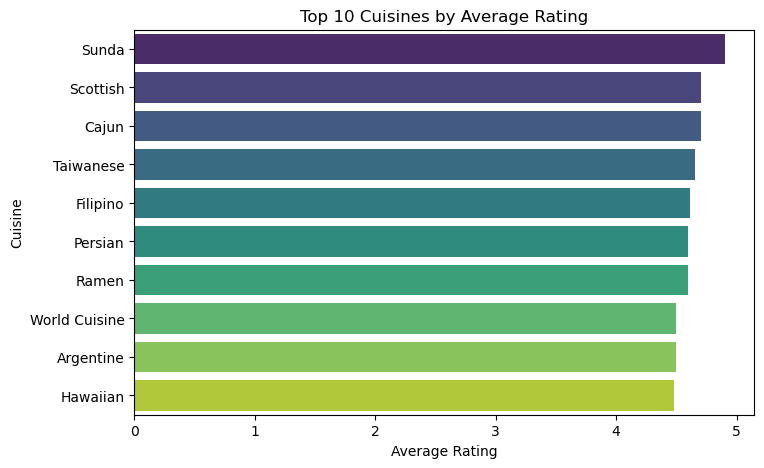

In [33]:


# Show top 10 cuisines by average rating
top_cuisines = cuisine_rating.nlargest(10, 'mean')

# Show bottom 10 cuisines by average rating
bottom_cuisines = cuisine_rating.nsmallest(10, 'mean')

# Plot top cuisines
plt.figure(figsize=(8, 5))
sns.barplot(x='mean', y='Cuisines', data=top_cuisines, palette='viridis')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()




##### Based on the Average rating Sunda is the top Cuisine.

#### 2.Identify the most popular cuisines among customers based on the number of votes.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Cuisines' and sum the votes
popular_cuisines = df.groupby('Cuisines')['Votes'].sum().reset_index()

# Sort the cuisines by the total votes in descending order
popular_cuisines = popular_cuisines.sort_values(by='Votes', ascending=False)

# Display the top 10 cuisines with the highest votes
top_cuisines = popular_cuisines.head(10)
print(top_cuisines)

        Cuisines   Votes
79  North Indian  356684
23          Cafe  116576
2       American  105447
54       Italian   95153
30   Continental   94569
27       Chinese   84918
35      European   45842
36     Fast Food   42617
12        Bakery   42008
87         Pizza   36415


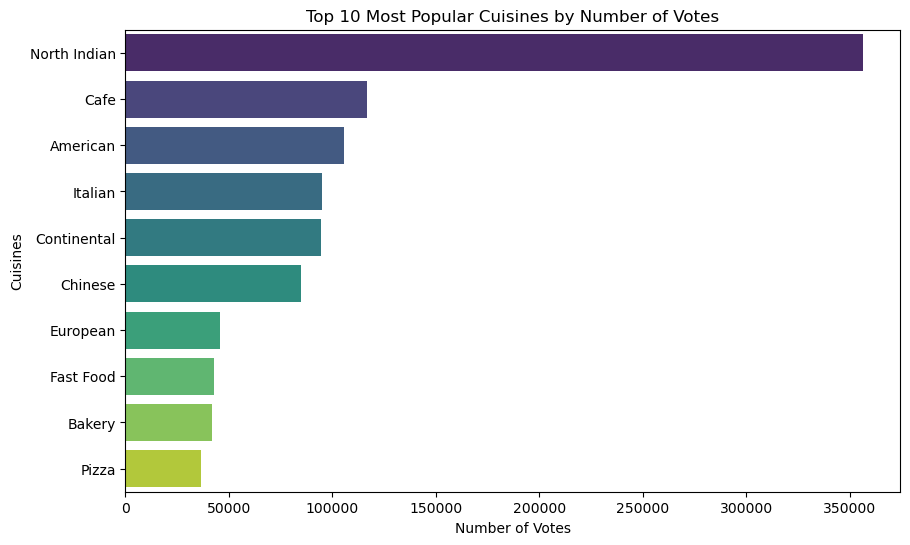

In [43]:
# Plot the top 10 cuisines based on votes
plt.figure(figsize=(10, 6))
sns.barplot(data=top_cuisines, x='Votes', y='Cuisines', palette='viridis')
plt.title('Top 10 Most Popular Cuisines by Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Cuisines')
plt.show()


##### Based on the number of votes North Indian Cuisines is the best.

#### 3. Determine if there are any specific cuisines that tend to receive higher ratings.

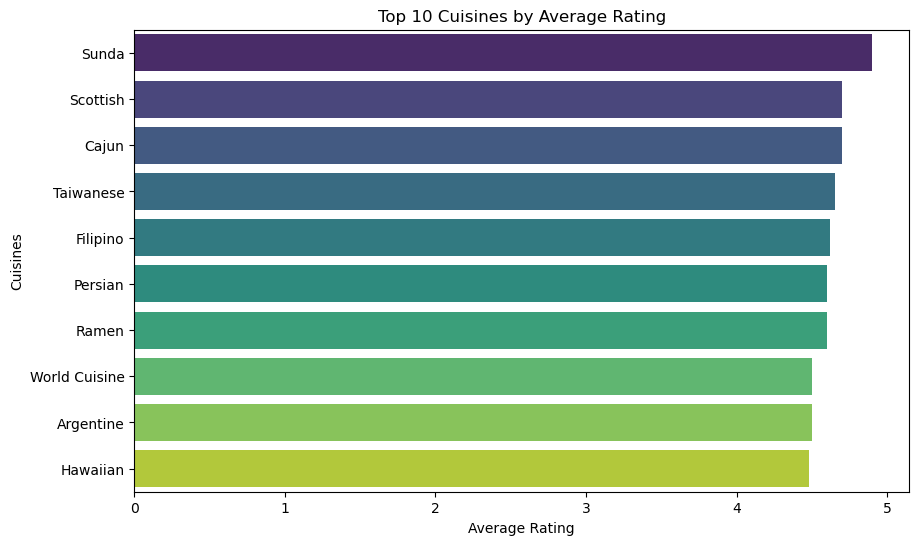

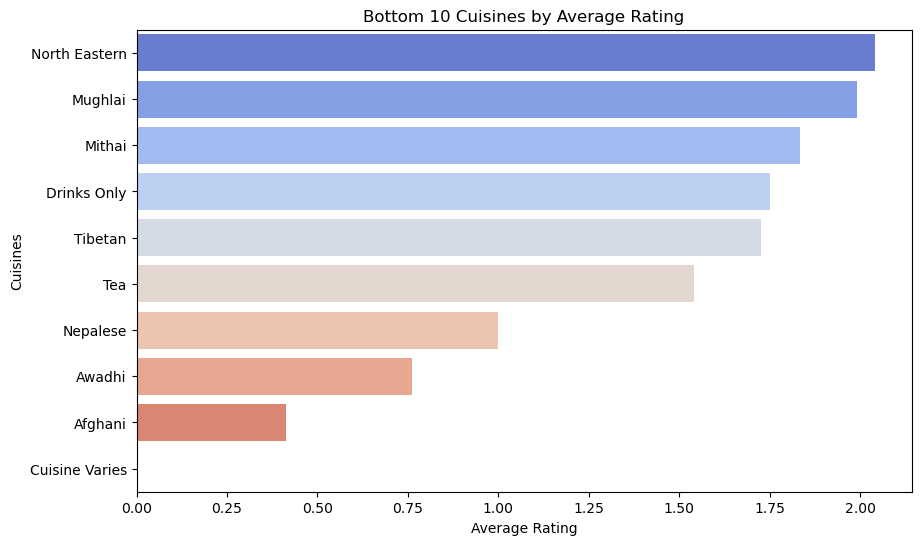

In [50]:
# Group by 'Cuisines' and calculate the average rating
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort cuisines by average rating in descending order
cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)

# Display the top 10 cuisines with the highest average ratings
top_rated_cuisines = cuisine_ratings.head(10)

# Plot the top 10 cuisines by average rating
plt.figure(figsize=(10, 6))
sns.barplot(data=top_rated_cuisines, x='Aggregate rating', y='Cuisines', palette='viridis')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisines')
plt.show()

# Display the bottom 10 cuisines with the lowest average ratings
low_rated_cuisines = cuisine_ratings.tail(10)

# Plot the bottom 10 cuisines by average rating
plt.figure(figsize=(10, 6))
sns.barplot(data=low_rated_cuisines, x='Aggregate rating', y='Cuisines', palette='coolwarm')
plt.title('Bottom 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisines')
plt.show()


#### Insights to Look For
Top-Rated Cuisines :
Cuisines with the highest average ratings indicate customer satisfaction or premium quality.<br>

Low-Rated Cuisines :
Cuisines with consistently low ratings may highlight areas for improvement in quality or service.<br>

Comparison with Popularity :
Compare the average ratings with the number of votes to determine if high-rated cuisines are also the most popular.